In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [65]:
img1 = cv2.imread("data/Level1.png")
print(img1.shape)

(177, 177, 3)


In [3]:
print(img1[0, 0])

[67 67 67]


In [66]:
h, w = img1.shape[:-1]
for i in range(h):
    if img1[i, 0, 0] != img1[i, 0, 1]:
        break
    for j in range(w):
        print(chr(int(img1[i, j, 0])), end='')
        if chr(int(img1[i, j, 0])) == ':':
            print('\n', i, j)
            break
    

Congrats on solving the first level of this task! You were able to figure out the ASCII text from the image, but wait! Your journey is not yet over. After the end of the text you will find a (200, 150, 3) coloured image. This image is a part of the bigger image called "zucky_elon.png". Find the top left coordinate (Image convention) from where this image was taken. The x coordinate represents the colour of a monochrome maze hidden in an image with coloured noise. Find the maze and solve the maze using any algothrim like dfs but better. Try comparing them and seeing how they perform like A*, RRT, RRT* for example. Once the maze is solved you will see a word. This word is a password to a password protected zip file which contains a png. Note that the password is case sensitive and all the aplhabets in the password will be capital letters This is your treasure. To open the treasure you need to convert the image in to an audio file in a simple way like you did for this ASCII text. Once con

In [5]:
temp = img1[6, 94:, :]
needle = np.append(temp, img1[7:, :, :].reshape(-1, 3), axis=0)
# needle[0] = img1[6:, :, :]
# print(needle.shape)
print(temp.shape)
print(needle.shape)
needle = needle[:30000].reshape((200, 150, 3))
print(needle.shape)

(83, 3)
(30173, 3)
(200, 150, 3)


In [6]:
haystack = cv2.imread('data/zucky_elon.png')

In [7]:
cv2.imshow('test', needle)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# res = cv2.matchTemplate(haystack, needle, method)
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [9]:
img = haystack.copy()
method = cv2.TM_CCOEFF

# Apply template Matching
res = cv2.matchTemplate(img, needle, method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(max_loc)

(230, 460)


In [10]:
# h, w = needle.shape[:-1]
# accumulator = np.ones((807,1264))
# for idx in range(3):
#     img = haystack.copy()[:, :, idx]
#     method = cv2.TM_CCOEFF

#     # Apply template Matching
#     res = cv2.matchTemplate(img,needle[:, :, idx], method)
#     accumulator = accumulator * res
    
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(accumulator)

# top_left = max_loc
# bottom_right = (top_left[0] + w, top_left[1] + h)
# print(top_left)

In [11]:
color = 230
maze = cv2.imread('data/maze_lv3.png')
print(maze.shape)

(180, 457, 3)


In [12]:
color = 230

mask = maze[:, :, 0] != color
# mask = mask.all(axis=-1)

In [13]:
maze2 = maze.copy()
maze2[mask] = [0, 0, 0]
maze2[~mask] = [255, 255, 255]

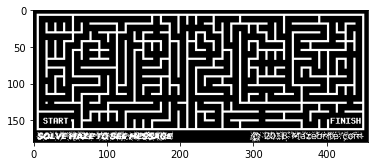

In [14]:
maze3 = maze2[:, :, 0]
plt.imshow(maze3, cmap='gray')
# plt.imshow(maze2,)
# cv2.imshow('test', maze3)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [15]:
# for row in maze:
#     for pixel in row:
#         if pixel[0] == pixel[1] == pixel[2]:
#             print(pixel)
# print(maze)

In [16]:
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
# closing = cv2.morphologyEx(maze3, cv2.MORPH_OPEN, kernel)
# kernel = np.ones((3,3),np.uint8)
# closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)
# closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)
# closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)
# closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)
# closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)

# closing = cv2.morphologyEx(maze3, cv2.MORPH_CLOSE, kernel)

In [17]:
# plt.imshow(closing, cmap='gray')
# cv2.imshow('test', closing)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [23]:
def get_maze(img):
	# Given colors (BGR format)
# 	start_color = np.array((113, 204, 45))
# 	end_color = np.array((60, 76, 231))
	obstacle_color = np.array((255, 255, 255))

# 	start = end = None
	h, w = img.shape 
	maze = np.ones(img.shape)

	# Loop over the pixels of the image and compare with the given values
	for i in range(h):
		for j in range(w):
			if np.all(img[i][j] == 255):
				maze[i][j] = 0

	return maze

In [24]:
print(maze3.shape)

(180, 457)


In [25]:
grid = get_maze(maze3)
np.sum(grid)

60999.0

In [26]:
print(needle.shape, haystack.shape)

(200, 150, 3) (977, 1440, 3)


In [27]:
print(grid.shape)

(180, 457)


In [28]:
start = np.array([150, 20])
end = np.array([150, 435])

In [29]:
from pathfinder import PathFinder

In [30]:
from heuristics import HeuristicManhattan

In [31]:
moves_4 = np.array([[0, -1], [-1, 0], [0, 1], [1, 0]])

In [32]:
pathfinder = PathFinder(grid, start, end, moves_4, HeuristicManhattan)

In [33]:
path_length = pathfinder.solve()

Hi 1
F 57559 0


In [34]:
print(path_length)

None


In [35]:
pathfinder.distances.shape

(180, 457)

In [36]:
print(grid[160, 430])

1.0


In [37]:
img1 = cv2.imread("data/Treasure/treasure_mp3.png")
print(img1.shape)
print(img1[0, 0])

(390, 390, 3)
[73 73 73]


In [58]:
s = []
for i in range(390):
    if img1[i, 0, 0] != img1[i, 0, 1]:
        break
    for j in range(390):
        s.append(int(img1[i, j, 0]))
# print(''.join(s))

In [59]:
print(len(s))
print(s[:100])

152100
[73, 68, 51, 4, 0, 0, 0, 0, 1, 71, 84, 88, 88, 88, 0, 0, 0, 18, 0, 0, 3, 109, 97, 106, 111, 114, 95, 98, 114, 97, 110, 100, 0, 100, 97, 115, 104, 0, 84, 88, 88, 88, 0, 0, 0, 17, 0, 0, 3, 109, 105, 110, 111, 114, 95, 118, 101, 114, 115, 105, 111, 110, 0, 48, 0, 84, 88, 88, 88, 0, 0, 0, 28, 0, 0, 3, 99, 111, 109, 112, 97, 116, 105, 98, 108, 101, 95, 98, 114, 97, 110, 100, 115, 0, 105, 115, 111, 54, 109, 112]


In [63]:
buffer = 10000
with open('out/treasure.mp3', 'wb') as f:
    for i in range(0, 152101 - buffer, buffer):
        f.write(bytes(s[i:i + buffer]))
    f.write(bytes(s[i + buffer:]))